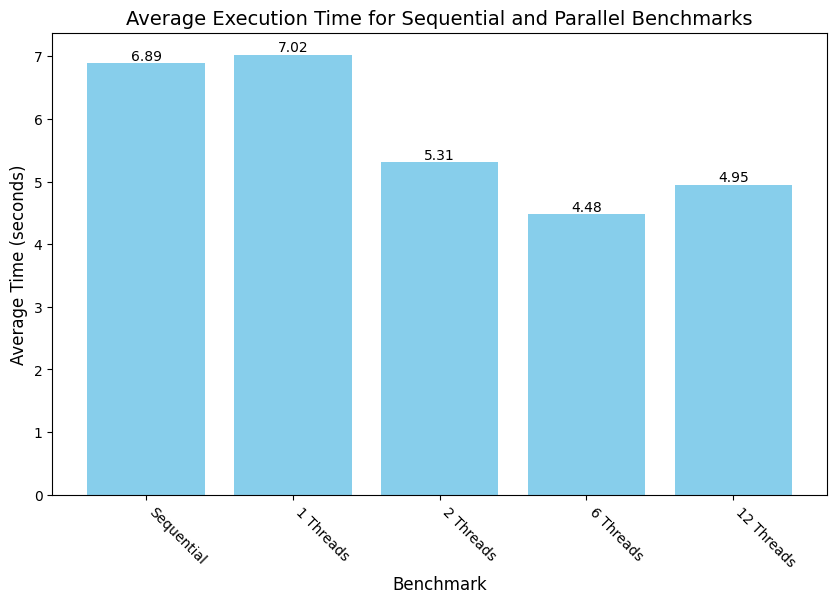

In [5]:
import re
import matplotlib.pyplot as plt

# 1. Read the contents of the file into a string variable.
with open('exercise2_benchmark.out', 'r') as file:
    file_content = file.read()

# 2. Use regular expressions to extract information.
sequential_section = re.search(r'Sequential Benchmark:\n((?:Run \d+ took \d+\.\d+ seconds\n)+)', file_content).group(1)
sequential_times = re.findall(r'Run \d+ took (\d+\.\d+) seconds', sequential_section)  

# Modified regex for parallel times to capture thread count and times
parallel_matches = re.findall(r'Parallel Benchmark \((\d+) threads\):\n((?:Run \d+ took \d+\.\d+ seconds\n)+)', file_content)

# 3. Process sequential times (FIXED).
sequential_times = [float(time) for time in sequential_times]
avg_sequential_time = sum(sequential_times) / len(sequential_times)

# 4. Process parallel times.
thread_counts = []
avg_parallel_times = []

for count, runs in parallel_matches:
    thread_counts.append(int(count))
    times = re.findall(r'took (\d+\.\d+) seconds', runs)
    times = [float(time) for time in times]
    avg_parallel_times.append(sum(times) / len(times))

# 5. Create labels and values for the bar plot.
labels = ['Sequential'] + [f'{threads} Threads' for threads in thread_counts]
times = [avg_sequential_time] + avg_parallel_times

# 6. Create a bar plot using Matplotlib.
plt.figure(figsize=(10, 6))
plt.bar(labels, times, color='skyblue')
plt.xlabel('Benchmark', fontsize=12)
plt.ylabel('Average Time (seconds)', fontsize=12)
plt.title('Average Execution Time for Sequential and Parallel Benchmarks', fontsize=14)
plt.xticks(rotation=-45, ha="left")

# Add labels on top of the bars
for i, time in enumerate(times):
    plt.text(i, time, f'{time:.2f}', ha='center', va='bottom')

# 7. Display the plot.
plt.show()